# chap2

In [74]:
import pandas as pd

In [75]:
sample_1 = pd.read_excel(r'C:\Users\mark8\scapy\datasalon\02_개정판\2_Data_Analysis_Basic\files\sample_1.xlsx', header = 1,
skipfooter = 2, usecols = 'A:C')
# header는 coloumn명이 있는 위치 1행이다 = 두번째 row
# skipfooter = 2 마지막 2행은 제외
# usecols = 'A:c' A칼럼부터 C칼럼까지 불러오기
sample_1.head(3)

국적코드  성별    입국객수
0  A01  남성  106320
1  A01  여성  191436
2  A31  남성     319

In [76]:
sample_1.tail(3)

국적코드  성별    입국객수
3  A31  여성      42
4  A18  남성  158912
5  A18  여성  232943

In [77]:
sample_1.info()
# 6 non-null object 칼럼은 빈칸없이 6개의 로우로 구성 object는 문자열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [78]:
sample_1.describe() # 숫자형 변수만 통계량 출력

입국객수
count       6.000000
mean   114995.333333
std     98105.752006
min        42.000000
25%     26819.250000
50%    132616.000000
75%    183305.000000
max    232943.000000

## 칼럼 선택

In [79]:
sample_1['입국객수']

0    106320
1    191436
2       319
3        42
4    158912
5    232943
Name: 입국객수, dtype: int64

In [80]:
sample_1[['입국객수', '국적코드']]

입국객수 국적코드
0  106320  A01
1  191436  A01
2     319  A31
3      42  A31
4  158912  A18
5  232943  A18

## 칼럼 생성

In [81]:
sample_1['기준년월'] = '2019-11'
sample_1

국적코드  성별    입국객수     기준년월
0  A01  남성  106320  2019-11
1  A01  여성  191436  2019-11
2  A31  남성     319  2019-11
3  A31  여성      42  2019-11
4  A18  남성  158912  2019-11
5  A18  여성  232943  2019-11

## 로우 선택

In [82]:
condition = (sample_1['성별'] == '남성')
condition

0     True
1    False
2     True
3    False
4     True
5    False
Name: 성별, dtype: bool

In [83]:
sample_1[condition]

국적코드  성별    입국객수     기준년월
0  A01  남성  106320  2019-11
2  A31  남성     319  2019-11
4  A18  남성  158912  2019-11

In [84]:
condition = (sample_1['입국객수'] >= 150000)
sample_1[condition] # 데이터프레임 데이터프레임 조건

국적코드  성별    입국객수     기준년월
1  A01  여성  191436  2019-11
4  A18  남성  158912  2019-11
5  A18  여성  232943  2019-11

In [85]:
conditions = (sample_1['성별'] == '남성') & (sample_1['입국객수'] >= 150000)
conditions

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [86]:
sample_1[conditions]

국적코드  성별    입국객수     기준년월
4  A18  남성  158912  2019-11

In [87]:
conditions = (sample_1['국적코드'] == 'A01')\
    |(sample_1['국적코드'] == 'A18')
sample_1[conditions]

국적코드  성별    입국객수     기준년월
0  A01  남성  106320  2019-11
1  A01  여성  191436  2019-11
4  A18  남성  158912  2019-11
5  A18  여성  232943  2019-11

In [88]:
## 한칼럼에 대해 여러 조건으로 필터링
conditions = (sample_1['국적코드'].isin(['A01', 'A18'])) # == A01 | A18
conditions

0     True
1     True
2    False
3    False
4     True
5     True
Name: 국적코드, dtype: bool

In [89]:
sample_1[conditions]

국적코드  성별    입국객수     기준년월
0  A01  남성  106320  2019-11
1  A01  여성  191436  2019-11
4  A18  남성  158912  2019-11
5  A18  여성  232943  2019-11

In [90]:
conditions = (sample_1['국적코드'].isin(['A01','A18']))
sample_1[(conditions) == False] # conditions가 아닌것

국적코드  성별  입국객수     기준년월
2  A31  남성   319  2019-11
3  A31  여성    42  2019-11

## 데이터 통합

In [91]:
sample_1

국적코드  성별    입국객수     기준년월
0  A01  남성  106320  2019-11
1  A01  여성  191436  2019-11
2  A31  남성     319  2019-11
3  A31  여성      42  2019-11
4  A18  남성  158912  2019-11
5  A18  여성  232943  2019-11

In [92]:
code_master = pd.read_excel(r'datasalon/02_개정판/2_Data_Analysis_Basic/files/sample_codemaster.xlsx')
code_master

국적코드     국적명
0  A01      일본
1  A02      대만
2  A03      홍콩
3  A18      중국
4  A19      이란
5  A22  우즈베키스탄
6  A23   카자흐스탄
7  A99  아시아 기타

In [93]:
sample_1_code = pd.merge(left = sample_1, right = code_master, how = 'left', left_on = '국적코드', right_on = '국적코드' )
sample_1_code

국적코드  성별    입국객수     기준년월  국적명
0  A01  남성  106320  2019-11   일본
1  A01  여성  191436  2019-11   일본
2  A31  남성     319  2019-11  NaN
3  A31  여성      42  2019-11  NaN
4  A18  남성  158912  2019-11   중국
5  A18  여성  232943  2019-11   중국

In [94]:
sample_1_code = pd.merge(left = sample_1, right = code_master, left_on = '국적코드', right_on = '국적코드' )
sample_1_code

국적코드  성별    입국객수     기준년월 국적명
0  A01  남성  106320  2019-11  일본
1  A01  여성  191436  2019-11  일본
2  A18  남성  158912  2019-11  중국
3  A18  여성  232943  2019-11  중국

In [95]:
sample_2 = pd.read_excel(r'datasalon/02_개정판/2_Data_Analysis_Basic/files/sample_2.xlsx',
header = 1, skipfooter = 2, usecols = 'A:C')
sample_2['기준년월'] = '2019-12'
sample_2_code = pd.merge(left = sample_2, right = code_master, how = 'left',
left_on = '국적코드', right_on = '국적코드')
sample_2_code

국적코드  성별    입국객수     기준년월 국적명
0  A01  남성   92556  2019-12  일본
1  A01  여성  163737  2019-12  일본
2  A18  남성  155540  2019-12  중국
3  A18  여성  249023  2019-12  중국

In [96]:
sample_1_code

국적코드  성별    입국객수     기준년월 국적명
0  A01  남성  106320  2019-11  일본
1  A01  여성  191436  2019-11  일본
2  A18  남성  158912  2019-11  중국
3  A18  여성  232943  2019-11  중국

In [97]:
sample = sample_1_code.append(sample_2_code, ignore_index =True)
sample

C:\Users\mark8\AppData\Local\Temp\ipykernel_22564\1456398833.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample = sample_1_code.append(sample_2_code, ignore_index =True)


국적코드  성별    입국객수     기준년월 국적명
0  A01  남성  106320  2019-11  일본
1  A01  여성  191436  2019-11  일본
2  A18  남성  158912  2019-11  중국
3  A18  여성  232943  2019-11  중국
4  A01  남성   92556  2019-12  일본
5  A01  여성  163737  2019-12  일본
6  A18  남성  155540  2019-12  중국
7  A18  여성  249023  2019-12  중국

In [98]:
sample_1_code.append(sample_2_code)

C:\Users\mark8\AppData\Local\Temp\ipykernel_22564\518034107.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sample_1_code.append(sample_2_code)


국적코드  성별    입국객수     기준년월 국적명
0  A01  남성  106320  2019-11  일본
1  A01  여성  191436  2019-11  일본
2  A18  남성  158912  2019-11  중국
3  A18  여성  232943  2019-11  중국
0  A01  남성   92556  2019-12  일본
1  A01  여성  163737  2019-12  일본
2  A18  남성  155540  2019-12  중국
3  A18  여성  249023  2019-12  중국

In [99]:
sample

국적코드  성별    입국객수     기준년월 국적명
0  A01  남성  106320  2019-11  일본
1  A01  여성  191436  2019-11  일본
2  A18  남성  158912  2019-11  중국
3  A18  여성  232943  2019-11  중국
4  A01  남성   92556  2019-12  일본
5  A01  여성  163737  2019-12  일본
6  A18  남성  155540  2019-12  중국
7  A18  여성  249023  2019-12  중국

## 데이터의 집계(pivot_table)

### 피벗테이블 : 기존 데이터의 칼럼을 재구성해서 데이터에 대한 통계를 한눈에 파악할수있게 정리한 표
### 피벗 기능을 이요하면 데이터를 원하는 형태로 손쉽게 집계가능 (**별로 데이터를 집계)

In [100]:
sample_pivot = sample.pivot_table(values = '입국객수', index = '국적명', columns = '기준년월', aggfunc = 'mean')
sample_pivot

기준년월   2019-11   2019-12
국적명                     
일본    148878.0  128146.5
중국    195927.5  202281.5

In [101]:
# aggfunc = mean, sum, min, median, max, count, nunique(중복을 제거한후 개수, 중복되지않은 원소의 개수)
# 인덱스만 있는 pivot_table
sample_pivot2 = sample.pivot_table(values = '입국객수', index = '국적명', aggfunc = 'max')
sample_pivot2

입국객수
국적명        
일본   191436
중국   249023

## 웹 크롤링

In [ ]:
pip install selenium

^C
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from selenium import webdriver

In [ ]:
driver = webdriver.Chrome(r'C:\Users\mark8\scapy\chrome-win64\chrome-win64\chrome.exe')

NoSuchDriverException: Message: Unable to obtain chromedriver using Selenium Manager; 'str' object has no attribute 'capabilities'; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [ ]:
# 예제 2-40 실습용 HTML
html = '''
<html>
    <head>
    </head>
    <body>
        <h1> 우리동네시장</h1>
            <div class = 'sale'>
                <p id='fruits1' class='fruits'>
                    <span class = 'name'> 바나나 </span>
                    <span class = 'price'> 3000원 </span>
                    <span class = 'inventory'> 500개 </span>
                    <span class = 'store'> 가나다상회 </span>
                    <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
                </p>
            </div>
            <div class = 'prepare'>
                <p id='fruits2' class='fruits'>
                    <span class ='name'> 파인애플 </span>
                </p>
            </div>
    </body>
</html>
'''

In [ ]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
soup


<html>
<head>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

In [ ]:
# beautiful soup 명령어인 select('조건')을 이용하면 html내에서 입력한 조건을 만족하는 태그를 모두 선택할수있다
# 조건 부분에는 해당 태그의 태그명이나 속성값을 지정하거나 태그간의 구조를 지정할수도있고
# 두방법을 모두 활용할 수 있다
# 1 태그명과 해당 태그의 속성 정보를 이용해 특정 태그를 찾을수 있습니다
# 태그명으로 태그 찾기
tags_span = soup.select('span')

tags_p = soup.select('p')


In [ ]:
# id, class로 태그 찾기
ids_fruits1 = soup.select('#fruits1') # 아이디
class_price = soup.select('.price') # 클래스 = 글꼴, 배경색
tags_span_class_price = soup.select('span.price') # 태그명.class

In [ ]:
tags_name = soup.select('span.name')
print(tags_name)

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]


In [ ]:
tags_banana1 = soup.select('#fruits1 > span.name')
print(tags_banana1)

[<span class="name"> 바나나 </span>]


In [ ]:
tags_banana2 = soup.select('div.sale > #fruits1 > span.name')# 한단계 아래
tags_banana3 = soup.select('div.sale span.name')# 몇단계 아래
print(tags_banana2)
print(tags_banana3)

[<span class="name"> 바나나 </span>]
[<span class="name"> 바나나 </span>]


In [ ]:
tags = soup.select('span.name') #span.name이 3개있으므로 리스트로 저장
tag_1 = tags[0]
print(tag_1)

<span class="name"> 바나나 </span>


In [ ]:
tags = soup.select('span.name')
for tag in tags:
    print(tag.text)

 바나나 
 파인애플 


In [ ]:
# 선택한 태그에서 정보 가져오기
# content = TAG.text
# attribute = TAG['속성명']
tags = soup.select('a')
tag = tags[0]
content = tag.text
print(content)
link = tag['href'] # a태그안에 href속성
print(link)

 홈페이지 
http://bit.ly/forPlaywithData


In [ ]:
# # requests 패키지 가져오기
# import requests               

# # 가져올 url 문자열로 입력
# url = 'https://www.naver.com'  

# # requests의 get함수를 이용해 해당 url로 부터 html이 담긴 자료를 받아옴
# response = requests.get(url)    

# # 우리가 얻고자 하는 html 문서가 여기에 담기게 됨
# html_text = response.text

In [ ]:
import requests
url = 'https://www.melon.com/chart/index.htm'
user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36'
hdr = {'User-Agent':user_agent}

response = requests.get(url, headers = hdr)
print(response)
html_text = response.text

<Response [200]>


In [ ]:
from bs4 import BeautifulSoup as bs
soup = bs(html_text, 'html.parser')
print(html)

In [ ]:
songs = soup.select('#lst50')
print(len(songs))
print(songs[0])

50
<tr class="lst50" data-song-no="36599950" id="lst50">
<td><div class="wrap t_right"><input class="input_check" name="input_check" title="Super Shy 곡 선택" type="checkbox" value="36599950"/></div></td>
<td><div class="wrap t_center"><span class="rank">1</span><span class="none">위</span></div></td>
<!-- 차트순위 추가 -->
<td><div class="wrap">
<span class="rank_wrap" title="순위 동일">
<span class="bullet_icons rank_static"><span class="none">순위 동일</span></span>
<span class="none">0</span>
</span>
</div></td>
<td><div class="wrap">
<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11281456');" title="NewJeans 2nd EP 'Get Up'">
<img alt="NewJeans 2nd EP 'Get Up' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/112/81/456/11281456_20230706180841_500.jpg/melon/resize/120/quality/80/optimize" width="60">
<span class="bg_album_frame"></span>
</img></a>
</div></td>
<td><div class="wrap">
<a class="btn button_icons type03

In [ ]:
song = songs[0]

In [ ]:
title = song.select('a')
len(title)
title

[<a class="image_typeAll" href="javascript:melon.link.goAlbumDetail('11281456');" title="NewJeans 2nd EP 'Get Up'">
 <img alt="NewJeans 2nd EP 'Get Up' - 페이지 이동" height="60" onerror="WEBPOCIMG.defaultAlbumImg(this);" src="https://cdnimg.melon.co.kr/cm2/album/images/112/81/456/11281456_20230706180841_500.jpg/melon/resize/120/quality/80/optimize" width="60">
 <span class="bg_album_frame"></span>
 </img></a>,
 <a class="btn button_icons type03 song_info" href="javascript:melon.link.goSongDetail('36599950');" title="Super Shy 곡정보"><span class="none">곡정보</span></a>,
 <a href="javascript:melon.play.playSong('1000002721',36599950);" title="Super Shy 재생">Super Shy</a>,
 <a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a>,
 <a href="javascript:melon.link.goArtistDetail('3114174');" title="NewJeans - 페이지 이동">NewJeans</a>,
 <a href="javascript:melon.link.goAlbumDetail('11281456');" title="NewJeans 2nd EP 'Get Up' - 페이지 이동">NewJeans 2nd EP 'Get Up'</a>

In [ ]:
# title이 리스트로 저장되있어서 [0]붙임 , [<a></a>]
title = song.select('#lst50 > td:nth-child(6) > div > div > div.ellipsis.rank01 > span > a')[0].text
title

'Super Shy'

In [ ]:
singer = song.select('#lst50 > td:nth-child(6) > div > div > div.ellipsis.rank02 > a')[0].text
singer

'NewJeans'

In [ ]:
import pandas as pd

In [ ]:
title_list = []
singer_list = []
for song in songs: # 50개 곡
    title = song.select('#lst50 > td:nth-child(6) > div > div > div.ellipsis.rank01 > span > a')[0].text
    singer = song.select('#lst50 > td:nth-child(6) > div > div > div.ellipsis.rank02 > a')[0].text
    title_list.append(title)
    singer_list.append(singer)
    print('{} : {}'.format(title, singer))
df = pd.DataFrame({'title':title_list,
                   'singer':singer_list})
print(df.head())
df.to_excel('./melon_Top50.xlsx')


Super Shy : NewJeans
Seven (feat. Latto) - Clean Ver. : 정국
ETA : NewJeans
퀸카 (Queencard) : (여자)아이들
헤어지자 말해요 : 박재정
I AM : IVE (아이브)
이브, 프시케 그리고 푸른 수염의 아내 : LE SSERAFIM (르세라핌)
Spicy : aespa
New Jeans : NewJeans
Steal The Show (From “엘리멘탈”) : Lauv
Hype boy : NewJeans
Kitsch : IVE (아이브)
UNFORGIVEN (feat. Nile Rodgers) : LE SSERAFIM (르세라핌)
사랑은 늘 도망가 : 임영웅
모래 알갱이 : 임영웅
Ditto : NewJeans
Candy : NCT DREAM
우리들의 블루스 : 임영웅
다시 만날 수 있을까 : 임영웅
손오공 : 세븐틴 (SEVENTEEN)
ISTJ : NCT DREAM
Cool With You : NewJeans
OMG : NewJeans
Attention : NewJeans
무지개 : 임영웅
이제 나만 믿어요 : 임영웅
London Boy : 임영웅
꽃 : 지수 (JISOO)
Polaroid : 임영웅
아버지 : 임영웅
Dynamite : 방탄소년단
Broken Melodies : NCT DREAM
After LIKE : IVE (아이브)
Still With You : 정국
사건의 지평선 : 윤하 (YOUNHA)
인생찬가 : 임영웅
A bientot : 임영웅
I Don't Think That I Like Her : Charlie Puth
손이 참 곱던 그대 : 임영웅
LOVE DIVE : IVE (아이브)
사랑해 진짜 : 임영웅
Butter : 방탄소년단
연애편지 : 임영웅
Dangerously : Charlie Puth
Cupid : FIFTY FIFTY
파이팅 해야지 (Feat. 이영지) : 부석순 (SEVENTEEN)
심(心) : DK(디셈버)
봄날 : 방탄소년단
Teddy Bear :

In [ ]:
import pandas as pd
kto_201901 = pd.read_excel(r'C:\Users\mark8\scapy\datasalon\01_초판\3_Tourists_Event\files\kto_201901.xlsx',
                           header = 1,
                           #skiprows=1,
                           usecols = 'A:G',
                           skipfooter = 4)
kto_201901.head()
# skiprows = 1 == header = 1

국적      관광     상용    공용  유학/연수      기타       계
0  아시아주  765082  10837  1423  14087  125521  916950
1    일본  198805   2233   127    785    4576  206526
2    대만   86393     74    22    180    1285   87954
3    홍콩   34653     59     2     90    1092   35896
4   마카오    2506      2     0     17      45    2570

In [ ]:
kto_201901.columns
kto_201901.tail()

국적   관광   상용  공용  유학/연수     기타      계
62  아프리카 기타  768  718  90    206    908   2690
63     기타대륙   33    4   0      1     16     54
64     국적미상   33    4   0      1     16     54
65     교포소계    0    0   0      0  15526  15526
66       교포    0    0   0      0  15526  15526

# chap3 데이터 전처리

In [ ]:
# 1. 데이터 탐색
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [ ]:
kto_201901.describe()

관광            상용           공용         유학/연수             기타  \
count      67.00000     67.000000    67.000000     67.000000      67.000000   
mean    26396.80597    408.208955   132.507463    477.462687    5564.208955   
std    102954.04969   1416.040302   474.406339   2009.484800   17209.438418   
min         0.00000      0.000000     0.000000      0.000000      16.000000   
25%       505.00000     14.500000     2.500000     17.500000     260.000000   
50%      1304.00000     45.000000    14.000000     43.000000     912.000000   
75%      8365.00000    176.500000    38.000000    182.000000    2824.500000   
max    765082.00000  10837.000000  2657.000000  14087.000000  125521.000000   

                   계  
count      67.000000  
mean    32979.194030  
std    122821.369969  
min        54.000000  
25%       927.000000  
50%      2695.000000  
75%     14905.500000  
max    916950.000000

In [ ]:
kto_201901.describe().loc['mean'].sort_values(ascending=False)

계        32979.194030
관광       26396.805970
기타        5564.208955
유학/연수      477.462687
상용         408.208955
공용         132.507463
Name: mean, dtype: float64

In [ ]:
import numpy as np
condition = ((kto_201901['관광'] == 0) | (kto_201901['상용'] == 0)\
             | (kto_201901['공용'] == 0)\
                |(kto_201901['유학/연수'] == 0))
condition # 시리즈가 bool형식으로 된거
kto_201901[condition]

국적    관광   상용  공용  유학/연수     기타      계
4      마카오  2506    2   0     17     45   2570
20    이스라엘   727   12   0      9     57    805
22  우즈베키스탄  1958  561   0    407   2828   5754
38     스위스   613   18   0     19     97    747
45     그리스   481   17   4      0    273    775
46    포르투갈   416   14   0     13    121    564
51   크로아티아   226   12   0      3    250    491
54     폴란드   713   10   0     27    574   1324
59  대양주 기타   555    3   4      0     52    614
63    기타대륙    33    4   0      1     16     54
64    국적미상    33    4   0      1     16     54
65    교포소계     0    0   0      0  15526  15526
66      교포     0    0   0      0  15526  15526

In [ ]:
# 데이터프레임에 기준년월 추가
kto_201901['기준년월'] = '2019-01'
kto_201901.head()

국적      관광     상용    공용  유학/연수      기타       계     기준년월
0  아시아주  765082  10837  1423  14087  125521  916950  2019-01
1    일본  198805   2233   127    785    4576  206526  2019-01
2    대만   86393     74    22    180    1285   87954  2019-01
3    홍콩   34653     59     2     90    1092   35896  2019-01
4   마카오    2506      2     0     17      45    2570  2019-01

In [ ]:
kto_201901['국적'].unique() # 중복을 제거한 값들을 보여주는 함수

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [ ]:
# 대륙제외 국가 칼럼에 국가만 남기기
continents_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

In [ ]:
condition = (kto_201901.국적.isin(continents_list) == False)
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [ ]:
kto_201901_country.head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월
1   일본  198805  2233  127    785  4576  206526  2019-01
2   대만   86393    74   22    180  1285   87954  2019-01
3   홍콩   34653    59    2     90  1092   35896  2019-01
4  마카오    2506     2    0     17    45    2570  2019-01
5   태국   34004    37  199     96  6998   41334  2019-01

In [ ]:
# 데이터를 필터링하다보면 인덱스값이 누락되므로 인덱스값 초기화 필요
kto_201901_country_newindex = kto_201901_country.reset_index(drop = True)
kto_201901_country_newindex.head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월
0   일본  198805  2233  127    785  4576  206526  2019-01
1   대만   86393    74   22    180  1285   87954  2019-01
2   홍콩   34653    59    2     90  1092   35896  2019-01
3  마카오    2506     2    0     17    45    2570  2019-01
4   태국   34004    37  199     96  6998   41334  2019-01

In [ ]:
# 대륙 칼럼값 만들기
continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['오세아니아'] * 3 \
+ ['아프리카'] * 2 + ['기타대륙'] + ['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


In [ ]:
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월   대륙
0   일본  198805  2233  127    785  4576  206526  2019-01  아시아
1   대만   86393    74   22    180  1285   87954  2019-01  아시아
2   홍콩   34653    59    2     90  1092   35896  2019-01  아시아
3  마카오    2506     2    0     17    45    2570  2019-01  아시아
4   태국   34004    37  199     96  6998   41334  2019-01  아시아

In [ ]:
kto_201901_country_newindex.tail()

국적   관광   상용  공용  유학/연수     기타      계     기준년월     대륙
55    대양주 기타  555    3   4      0     52    614  2019-01  오세아니아
56  남아프리카공화국  368    9   1      6    616   1000  2019-01   아프리카
57   아프리카 기타  768  718  90    206    908   2690  2019-01   아프리카
58      국적미상   33    4   0      1     16     54  2019-01   기타대륙
59        교포    0    0   0      0  15526  15526  2019-01     교포

In [ ]:
kto_201901_country_newindex['관광객비율(%)'] = \
round(kto_201901_country_newindex['관광'] / kto_201901_country_newindex['계'] * 100, 1)
# 관광/전체*100
kto_201901_country_newindex.head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월   대륙  관광객비율(%)
0   일본  198805  2233  127    785  4576  206526  2019-01  아시아      96.3
1   대만   86393    74   22    180  1285   87954  2019-01  아시아      98.2
2   홍콩   34653    59    2     90  1092   35896  2019-01  아시아      96.5
3  마카오    2506     2    0     17    45    2570  2019-01  아시아      97.5
4   태국   34004    37  199     96  6998   41334  2019-01  아시아      82.3

In [ ]:
# 관광으로 온 상위 5개국
# by로 한번에 sort후 df출력
kto_201901_country_newindex.sort_values(by = '관광객비율(%)', ascending = False).head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월     대륙  관광객비율(%)
1       대만   86393    74   22    180  1285   87954  2019-01    아시아      98.2
3      마카오    2506     2    0     17    45    2570  2019-01    아시아      97.5
2       홍콩   34653    59    2     90  1092   35896  2019-01    아시아      96.5
0       일본  198805  2233  127    785  4576  206526  2019-01    아시아      96.3
55  대양주 기타     555     3    4      0    52     614  2019-01  오세아니아      90.4

In [ ]:
# 조건후 / 시리즈 출력
condition = kto_201901_country_newindex['관광객비율(%)'].sort_values(ascending = False)
condition

1     98.2
3     97.5
2     96.5
0     96.3
55    90.4
19    90.3
53    89.6
23    87.3
5     86.3
34    85.9
16    85.4
8     85.0
4     82.3
35    82.1
17    81.5
30    78.7
7     75.3
54    74.5
43    73.8
41    73.8
36    72.1
31    71.9
28    70.8
33    70.2
40    70.1
37    69.2
27    69.2
39    69.1
38    68.9
25    68.5
47    68.5
29    68.0
32    67.7
45    65.9
26    64.5
42    62.1
22    61.1
58    61.1
52    61.0
51    53.9
10    53.2
44    48.0
49    47.2
6     46.9
48    46.0
20    44.4
56    36.8
50    35.7
24    34.3
21    34.0
18    32.6
57    28.6
11    26.7
46    26.2
9     24.7
15    23.6
13    23.1
12    12.2
14    11.9
59     0.0
Name: 관광객비율(%), dtype: float64

In [ ]:
k = kto_201901_country_newindex.pivot_table(values = '관광객비율(%)', 
                                        index = '대륙',
                                        aggfunc = 'mean')
# 인덱스2개 끼리 확인하는것이 pivot_table

In [ ]:
k.sort_values(by = '관광객비율(%)', ascending = False)

관광객비율(%)
대륙              
오세아니아  84.833333
아메리카   68.200000
유럽     63.826087
기타대륙   61.100000
아시아    59.624000
아프리카   32.700000
교포      0.000000

In [ ]:
# 중국 국적만 필터링
condition = (kto_201901_country_newindex.국적 == '중국')
kto_201901_country_newindex[condition]

국적      관광    상용   공용  유학/연수     기타       계     기준년월   대륙  관광객비율(%)
17  중국  320113  2993  138   8793  60777  392814  2019-01  아시아      81.5

In [ ]:
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum

884293

In [ ]:
kto_201901_country_newindex['전체비율(%)'] = round(kto_201901_country_newindex['관광'] / tourist_sum * 100, 1)
kto_201901_country_newindex.head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월   대륙  관광객비율(%)  \
0   일본  198805  2233  127    785  4576  206526  2019-01  아시아      96.3   
1   대만   86393    74   22    180  1285   87954  2019-01  아시아      98.2   
2   홍콩   34653    59    2     90  1092   35896  2019-01  아시아      96.5   
3  마카오    2506     2    0     17    45    2570  2019-01  아시아      97.5   
4   태국   34004    37  199     96  6998   41334  2019-01  아시아      82.3   

   전체비율(%)  
0     22.5  
1      9.8  
2      3.9  
3      0.3  
4      3.8

In [ ]:
kto_201901_country_newindex.sort_values(by = '전체비율(%)', ascending = False).head()

국적      관광    상용    공용  유학/연수     기타       계     기준년월    대륙  관광객비율(%)  \
17  중국  320113  2993   138   8793  60777  392814  2019-01   아시아      81.5   
0   일본  198805  2233   127    785   4576  206526  2019-01   아시아      96.3   
1   대만   86393    74    22    180   1285   87954  2019-01   아시아      98.2   
25  미국   42989   418  2578    229  16523   62737  2019-01  아메리카      68.5   
2   홍콩   34653    59     2     90   1092   35896  2019-01   아시아      96.5   

    전체비율(%)  
17     36.2  
0      22.5  
1       9.8  
25      4.9  
2       3.9

In [ ]:
# create_kto_data 함수생성
#1 불러올 엑셀 파일 경로를 지정
def create_kto_data(yy, mm):
    file_path = r'C:\Users\mark8\scapy\datasalon\01_초판\3_Tourists_Event\files{0}{1}.xlsx'.format(yy, mm)
    
    #2 엑셀 파일 불러오기
    df = pd.read_excel(file_path, header = 1, skipfooter = 4, usecols = 'A:G')

    #3 기준년월 칼럼 추가
    df['기준년월'] = '{}-{}'.format(yy, mm)

    #4 '국적' 칼럼에서 대륙 제거하고 국가만 남기기
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']
    condition = (df['국적'].isin(ignore_list) == False)
    df_country = df[condition].reset_index(drop = True)

    #5 대륙 칼럼 추가
    continents = ['아시아'] * 25 + ['아메리카'] * 5 + ['유럽'] * 23 + ['대양주'] * 3 + ['아프리카'] * 2 + ['기타대륙'] + ['교포']
    df_country['대륙'] = continents

    #6 국가별 '관광객비율' 칼럼 추가
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1)

    #7 '전체비율(%)' 칼럼 추가
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)

    #8 결과 출력
    return(df_country)
 

In [ ]:
kto_test = create_kto_data(2018, 12)
kto_test

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mark8\\scapy\\datasalon\\01_초판\\3_Tourists_Event\\files201812.xlsx'

In [ ]:
# 시계열 그래프 그리기
import pandas as pd
df = pd.read_excel(r'C:\Users\mark8\scapy\datasalon\01_초판\3_Tourists_Event\files\kto_total.xlsx')
df.head()

국적      관광    상용  공용  유학/연수    기타       계     기준년월   대륙  관광객비율(%)  전체비율(%)
0   일본  202825  1750  89    549  3971  209184  2010-01  아시아      97.0     50.6
1   대만   35788    41  17     37   516   36399  2010-01  아시아      98.3      8.9
2   홍콩   13874    55   0     21   595   14545  2010-01  아시아      95.4      3.5
3  마카오     554     0   0      0     0     554  2010-01  아시아     100.0      0.1
4   태국   13374    39  13     53  4335   17814  2010-01  아시아      75.1      3.3

In [ ]:
# 예제 3-38 그래프에서 한글 표기를 위한 글자체 변경(윈도우, 맥os 각각의 경우에 대해서 처리)
from matplotlib import font_manager, rc
import platform 

if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
condition = (df['국적'] == '일본')
df_filter = df[condition]
df_filter.head()

국적      관광    상용   공용  유학/연수    기타       계     기준년월   대륙  관광객비율(%)  \
0    일본  202825  1750   89    549  3971  209184  2010-01  아시아      97.0   
60   일본  224475  1455   63   1172  3197  230362  2010-02  아시아      97.4   
120  일본  299820  1483  124    519  4180  306126  2010-03  아시아      97.9   
180  일본  233697  1282   74    154  3868  239075  2010-04  아시아      97.8   
240  일본  233311  1480  150    216  6538  241695  2010-05  아시아      96.5   

     전체비율(%)  
0       50.6  
60      50.3  
120     55.0  
180     43.0  
240     44.4

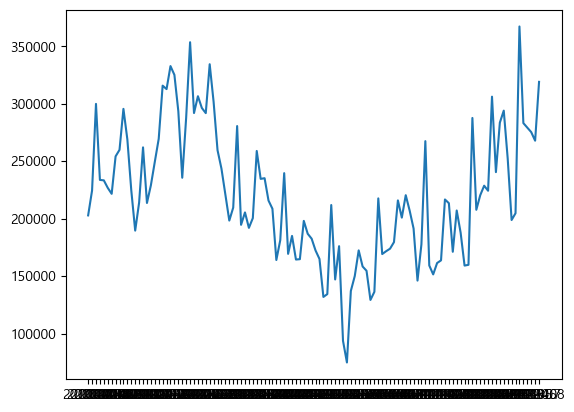

In [ ]:
# 시계열 그래프 그리기
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

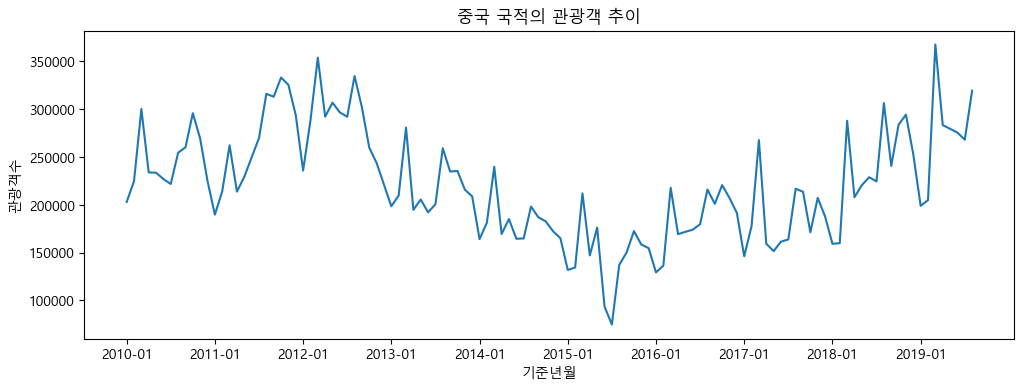

In [ ]:
# 그래프 크기 조절
plt.figure(figsize = (12, 4))
# 그래프 내용 설정
plt.plot(df_filter['기준년월'], df_filter['관광'])

# 그래프 타이틀, x축, y축 이름 달기
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

# x축 눈금값 설정
plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])
plt.show()

In [ ]:
# 상위 5개국 별로 시계열 그래프 그리기
cntry_list = ['중국', '일본', '대만', '미국', '홍콩']

ConversionError: Failed to convert value(s) to axis units: ['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01']

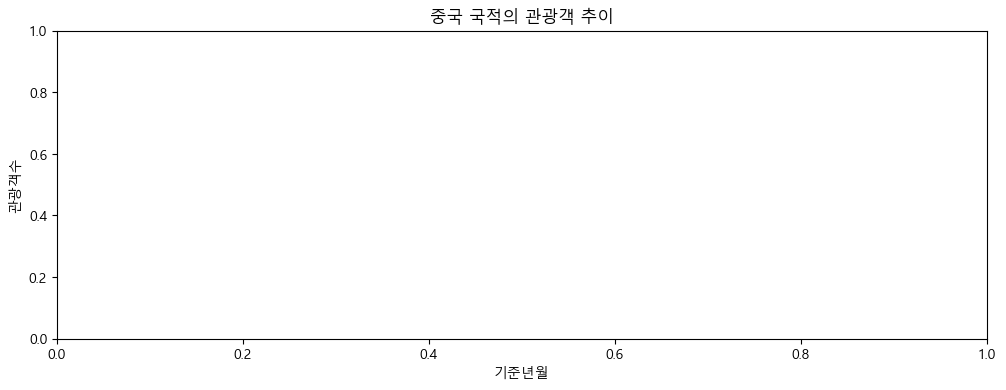

In [103]:
for cntry in cntry_list:
    # 국적 관광객만 추출
    condition = (df['국적'] == cntry)
    df_filter = df[condition]

    # 그래프 그리기
    
    # 그래프 크기 조절
    plt.figure(figsize = (12, 4))
    # 그래프 내용 설정

    # # 그래프 타이틀, x축, y축 이름 달기
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')

    # # x축 눈금값 설정
    plt.xticks(['2010-01', '2011-01', '2012-01', '2013-01', '2014-01', '2015-01', '2016-01', '2017-01', '2018-01', '2019-01'])
    plt.plot(df_filter['기준년월'], df_filter['관광'])    
    # plt.show()

In [109]:
# 히트맵 그래프 그리기
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)
df.head()


국적      관광    상용  공용  유학/연수    기타       계     기준년월   대륙  관광객비율(%)  \
0   일본  202825  1750  89    549  3971  209184  2010-01  아시아      97.0   
1   대만   35788    41  17     37   516   36399  2010-01  아시아      98.3   
2   홍콩   13874    55   0     21   595   14545  2010-01  아시아      95.4   
3  마카오     554     0   0      0     0     554  2010-01  아시아     100.0   
4   태국   13374    39  13     53  4335   17814  2010-01  아시아      75.1   

   전체비율(%)    년도   월  
0     50.6  2010  01  
1      8.9  2010  01  
2      3.5  2010  01  
3      0.1  2010  01  
4      3.3  2010  01

In [110]:
condition = (df['국적'] == '중국')
df_filter = df[condition]
df_filter.head()

국적     관광     상용   공용  유학/연수     기타       계     기준년월   대륙  관광객비율(%)  \
17   중국  40425  11930   55   2751  36091   91252  2010-01  아시아      44.3   
77   중국  60590   7907   68  29546  42460  140571  2010-02  아시아      43.1   
137  중국  50330  13549  174  14924  62480  141457  2010-03  아시아      35.6   
197  중국  84252  13306  212   2199  47711  147680  2010-04  아시아      57.1   
257  중국  89056  12325  360   2931  49394  154066  2010-05  아시아      57.8   

     전체비율(%)    년도   월  
17      10.1  2010  01  
77      13.6  2010  02  
137      9.2  2010  03  
197     15.5  2010  04  
257     17.0  2010  05

In [ ]:
from selenium import webdriver
driver = webdriver.Chrome('c:/playwithdata/chromedriver.exe')


NoSuchDriverException: Message: Unable to obtain chromedriver using Selenium Manager; 'str' object has no attribute 'capabilities'; For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors/driver_location


In [ ]:
import time
from bs4 import BeautifulSoup
soup = BeautifulSoup(r'C:\Users\mark8\scapy\datasalon\02_개정판\5_Jeju_Hotplace\files\3_jeju_cluster.html', 'html.parser')

first = soup.select('div._9AhH0')
first

C:\Users\mark8\AppData\Local\Temp\ipykernel_21600\3764209797.py:3: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(r'C:\Users\mark8\scapy\datasalon\02_개정판\5_Jeju_Hotplace\files\3_jeju_cluster.html', 'html.parser')


[]

In [ ]:
# 수집데이터 워드클라우드로 시각화
import pandas as pd
raw_total = pd.read_excel(r'datasalon/02_개정판/5_Jeju_Hotplace/files/1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...
1    ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...
2    ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...
Name: tags, dtype: object

In [ ]:
tags_total = []

for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("', '") # 처음 2부터 뒤 -2까지
    print(tags[2:-2])
    print(tags_list)
    for tag in tags_list:
        tags_total.append(tag)
tags_total

#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이
['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가볼만한곳', '#제주도핫플', '#제주여행코스', '#제주공항', '#제주도맛집', '#제주맛집', '#제주스냅', '#제주풍경', '#제주사진', '#제주카페', '#제주도카페', '#산굼부리', '#제주도바다', '#귤체험', '#우도', '#제주관광', '#제주도여향지', '#제주여행중', '#삼육오빠', '#제주앓이']
#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#제주맛집', '#여행', '#제주맛집추천', '#맛집추천', '#제주공항', '#제주카페', '#제주디저트맛집', '#제주데이트', '#제주데이트코스', '#제주도여행', '#고집돌우럭', '#중문맛집', '#제주여행중', '#감귤카페', '#제주카페추천', '#제주야시장', '#맛집', '#제주갈만한곳', '#제주관광', '#좋아요반사', '#좋반', '#제주도여행지', '#제주도가볼만한곳', '#제주여행코스
['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#제주맛집', '#여행', '#제주맛집추천', '#맛집추천', '#제주공항', '#제주카페', '#제주디저트맛집', '#제주데이트', '#제주데이트코스', '#제주도여행', '#고집돌우럭', '#중문맛집', '#제주여행중', '#감귤카페', '#제주카페추천', '#제주야시장', '#맛집', '#제주갈만한곳', '#제주관광', '#좋아요반사', '#좋반', '#제주도여행지', '#제주도가볼만한곳',

['#제주핫플레이스',
 '#제주여행',
 '#제주여행',
 '#제주도여행',
 '#제주가볼만한곳',
 '#제주도핫플',
 '#제주여행코스',
 '#제주공항',
 '#제주도맛집',
 '#제주맛집',
 '#제주스냅',
 '#제주풍경',
 '#제주사진',
 '#제주카페',
 '#제주도카페',
 '#산굼부리',
 '#제주도바다',
 '#귤체험',
 '#우도',
 '#제주관광',
 '#제주도여향지',
 '#제주여행중',
 '#삼육오빠',
 '#제주앓이',
 '#제주핫플',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도맛집',
 '#제주맛집',
 '#여행',
 '#제주맛집추천',
 '#맛집추천',
 '#제주공항',
 '#제주카페',
 '#제주디저트맛집',
 '#제주데이트',
 '#제주데이트코스',
 '#제주도여행',
 '#고집돌우럭',
 '#중문맛집',
 '#제주여행중',
 '#감귤카페',
 '#제주카페추천',
 '#제주야시장',
 '#맛집',
 '#제주갈만한곳',
 '#제주관광',
 '#좋아요반사',
 '#좋반',
 '#제주도여행지',
 '#제주도가볼만한곳',
 '#제주여행코스',
 '#honestin',
 '#어니스틴',
 '#제주여행',
 '#제주',
 '#제주도',
 '#제주도여행',
 '#제주살이',
 '#제주도민',
 '#제주가볼만한곳',
 '#제주일상',
 '#제주도가볼만한곳',
 '#제주핫플레이스',
 '#제주핫플',
 '#제주라이프',
 '#가을제주',
 '#제주시',
 '#제주여행코스',
 '#제주도핫플',
 '#제주오름',
 '#들렁모루',
 '#비밀의정원',
 '#삼굼부리',
 '#정물오름',
 '#자연생태마을',
 '#오조포구',
 '#올레길',
 '#제주하늘',
 '#제주관광',
 '#11월여행',
 '#제주관광',
 '#제주살이',
 '#제주이주민',
 '#아라동주민',
 '#삼남매집',
 '#새해첫날',
 '#드라이브',
 '#명월국민학교',
 '#낙서',
 '#잡히면죽는다',
 '#제주관광',
 '#제주',
 '#돔나이트',

In [ ]:
from collections import Counter
tags_counts = Counter(tags_total)
tags_counts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435)]

In [ ]:
# 4-14 데이터 정제
STOPWORDS = ['#일상', '#선팔', '#제주도', '#jeju', '#반영구', '#제주자연눈썹', '#서귀포눈썹문신', '#제주눈썹문신', '#소통', '#맞팔']

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS: # stopwords 제외해서 저장
        tag_total_selected.append(tag)
    
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(50)


[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주', 1567),
 ('#제주도여행', 1555),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('', 588),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#눈썹문신', 443),
 ('#제주속눈썹', 435),
 ('#서귀포남자눈썹문신', 433),
 ('#서귀포자연눈썹', 433),
 ('#제주남자눈썹문신', 433),
 ('#서귀포속눈썹', 433),
 ('#서귀포반영구', 433),
 ('#제주스타그램', 432),
 ('#제주일상', 424),
 ('#애월맛집', 410)]

In [ ]:
##
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ['win32', 'win64']:
    font_name = 'malgun gothic'
elif sys.platform == 'darwin':
    font_name = 'AppleGothic'

    
rc('font', family = font_name)

In [ ]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30)) #인자 1개는 값만 넣을경우 
print(tag_counts_df)
tag_counts_df.columns = ['tags', 'counts']
print(tag_counts_df)

            0     1
0       #제주맛집  3750
1      #제주도맛집  3467
2       #제주여행  3204
3       #제주관광  2898
4         #제주  1567
5      #제주도여행  1555
6      #서귀포맛집  1392
7   #제주도가볼만한곳  1047
8        #서귀포   872
9    #제주핫플레이스   848
10   #제주흑돼지맛집   730
11    #제주맛집추천   728
12    #제주도흑돼지   713
13      #제주카페   711
14  #제주도흑돼지맛집   709
15     #제주흑돼지   693
16      #협재맛집   677
17     #성산일출봉   674
18      #제주도민   637
19     #제주도그램   609
20  #서귀포흑돼지맛집   605
21              588
22    #서귀포흑돼지   582
23   #제주가볼만한곳   580
24   #성산일출봉맛집   567
25      #섭지코지   558
26    #제주도민맛집   542
27      #제주핫플   530
28    #섭지코지맛집   519
29      #제주살이   516
         tags  counts
0       #제주맛집    3750
1      #제주도맛집    3467
2       #제주여행    3204
3       #제주관광    2898
4         #제주    1567
5      #제주도여행    1555
6      #서귀포맛집    1392
7   #제주도가볼만한곳    1047
8        #서귀포     872
9    #제주핫플레이스     848
10   #제주흑돼지맛집     730
11    #제주맛집추천     728
12    #제주도흑돼지     713
13      #제주카페     711
14  #제주도흑돼지맛집     709
15     #제주흑돼지     693
16    

In [ ]:
print(tag_counts_df)

         tags  counts
0       #제주맛집    3750
1      #제주도맛집    3467
2       #제주여행    3204
3       #제주관광    2898
4         #제주    1567
5      #제주도여행    1555
6      #서귀포맛집    1392
7   #제주도가볼만한곳    1047
8        #서귀포     872
9    #제주핫플레이스     848
10   #제주흑돼지맛집     730
11    #제주맛집추천     728
12    #제주도흑돼지     713
13      #제주카페     711
14  #제주도흑돼지맛집     709
15     #제주흑돼지     693
16      #협재맛집     677
17     #성산일출봉     674
18      #제주도민     637
19     #제주도그램     609
20  #서귀포흑돼지맛집     605
21                588
22    #서귀포흑돼지     582
23   #제주가볼만한곳     580
24   #성산일출봉맛집     567
25      #섭지코지     558
26    #제주도민맛집     542
27      #제주핫플     530
28    #섭지코지맛집     519
29      #제주살이     516


<AxesSubplot:xlabel='counts', ylabel='tags'>

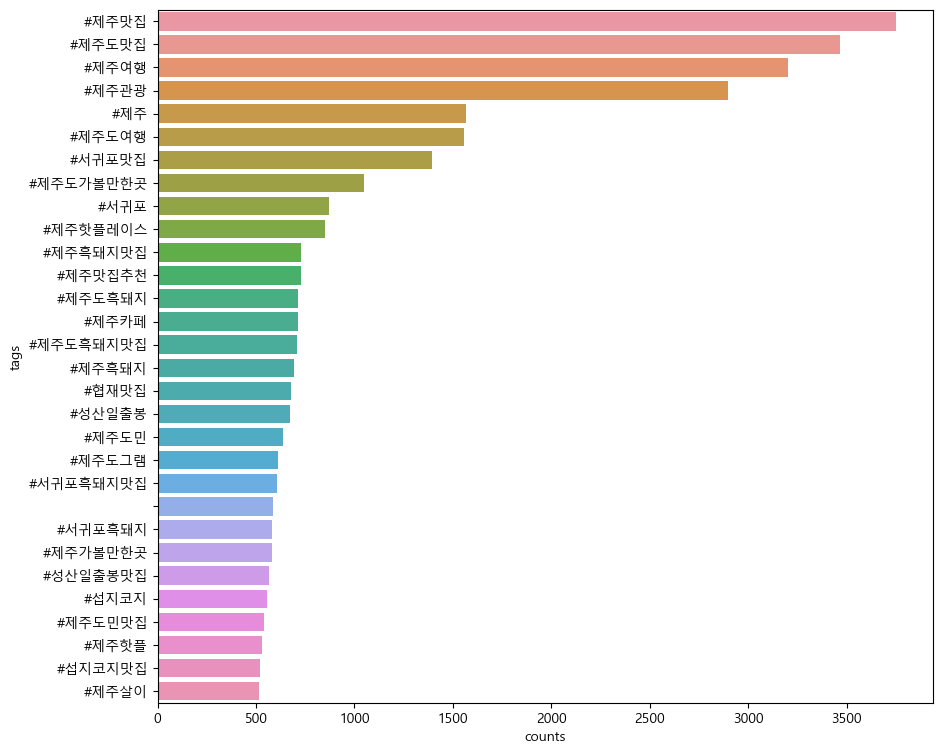

In [ ]:
plt.figure(figsize = (10, 9
                      
                      )) #plt.figure은 차트이미지의 크기 조정함수
sns.barplot(x = 'counts', y = 'tags', data = tag_counts_df)

In [ ]:
pip install wordcloud


     ---------------------------------------- 0.0/152.1 kB ? eta -:--:--
     -------------------------------------- 152.1/152.1 kB 4.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

In [ ]:
!apt-get updatde -qq
!apt-get install fonts-nanum* -qq

'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'apt-get'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [ ]:
WordCloud = WordCloud(font_path = 'font/NanumPen.ttf',
                background_color='white',
                      max_words = 100,
                            relative_scaling=0.3,
                                  width = 800,
                                        height = 400).generate(txt)

NameError: name 'txt' is not defined

In [ ]:
import pandas as pd
raw_total = pd.read_excel(r'C:\Users\mark8\scapy\datasalon\02_개정판\5_Jeju_Hotplace\files\1_crawling_raw.xlsx')
raw_total.head()

content        date   like  \
0  더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...  2018-12-07  1,402   
1  12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...  2018-12-03    368   
2  11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...  2018-11-02    166   
3  국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...  2019-01-01     28   
4  #제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...  2019-01-01     12   

    place                                               tags  
0     NaN  ['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가...  
1     NaN  ['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#...  
2     NaN  ['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',...  
3  명월국민학교  ['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'...  
4     NaN  ['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추...

In [ ]:
location_counts = raw_total['place'].value_counts()
location_counts

Jeju                    271
Jeju-do                 179
Jungle Book by Alice    108
Seogwipo                 66
제주도 크리스마스 박물관            59
                       ... 
제주마당                      1
형제섬                       1
동복해녀식당                    1
종로 광장시장                   1
디스이즈핫                     1
Name: place, Length: 1028, dtype: int64

In [ ]:
location_counts_df = pd.DataFrame(location_counts)
location_counts_df.head()

place
Jeju                    271
Jeju-do                 179
Jungle Book by Alice    108
Seogwipo                 66
제주도 크리스마스 박물관            59

In [ ]:
location_counts_df.to_excel('./3_3_location_counts.xlsx')

In [ ]:
locations = list(location_counts.index)
locations

['Jeju',
 'Jeju-do',
 'Jungle Book by Alice',
 'Seogwipo',
 '제주도 크리스마스 박물관',
 '할로비치',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '폼포코식당_pompokokitchen',
 '1100고지',
 'Nimome',
 '월정리해변',
 '고집돌우럭중문점',
 '석부작박물관',
 '제주도 애월읍',
 '알뜨르 비행장',
 '카멜리아 힐',
 '제주레포츠랜드',
 '밥깡패',
 '제주 함덕 서우봉 해변',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '위미동백나무군락지',
 '제주신화월드 Jeju Shinhwa World',
 'Woljeongri Beach',
 '협재해변 Beach',
 '연동 바오젠 거리',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '고래배꼽',
 '제주 성산 신산포구자연산횟집 회포장',
 '새별오름',
 '용머리해안',
 '용눈이오름',
 '캔디원',
 '사려니숲길',
 '하이엔드 제주',
 '제주빅볼랜드',
 '서귀포 느영나영 게스트하우스',
 '휴애리 자연생활공원',
 '옹포리',
 '삼무공원',
 '마마뜰',
 '제주어린왕자게스트하우스',
 '위미동백나무군락',
 '제주커피박물관 Baum',
 'Jeju Aewol',
 '한라산',
 '위미2리 동백군락지',
 'Jeju Island 제주특별자치도 济州道',
 '광치기해변',
 '서우봉',
 '제주해남',
 '한라산 (漢拏山, Hallasan)',
 '카페한라산',
 '성이시돌목장',
 '제주 송악산',
 '옹포별장가든',
 '월정리카페콧수염',
 '牛岛 Udo Island 우도',
 '곽지해수욕장',
 '카페브리프',
 '아줄레주',
 '에코랜드',
 '산굼부리',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 'Terarosa - 테라로사',

# 5장 입지분석

In [ ]:
# 파이썬을 이용해 매장목록 데이터 수집
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd